In [1]:
import sys  
sys.path.insert(0, './scripts')
import MPimports as mpi

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
model_dl = mpi.SequenceDLEnd2end()
model_dl.preprocess_data()
# model_dl.load_trained()

Selected device: cuda


In [4]:
loader = model_dl.get_dataloader_pred(model_dl._test_split)
preds = model_dl._torch_predict(loader)
loader = model_dl.get_dataloader_pred(model_dl._test_split, p_protein_mutation=0.01)
preds_001 = model_dl._torch_predict(loader)
loader = model_dl.get_dataloader_pred(model_dl._test_split, p_protein_mutation=0.05)
preds_005 = model_dl._torch_predict(loader)
loader = model_dl.get_dataloader_pred(model_dl._test_split, p_protein_mutation=0.10)
preds_010 = model_dl._torch_predict(loader)

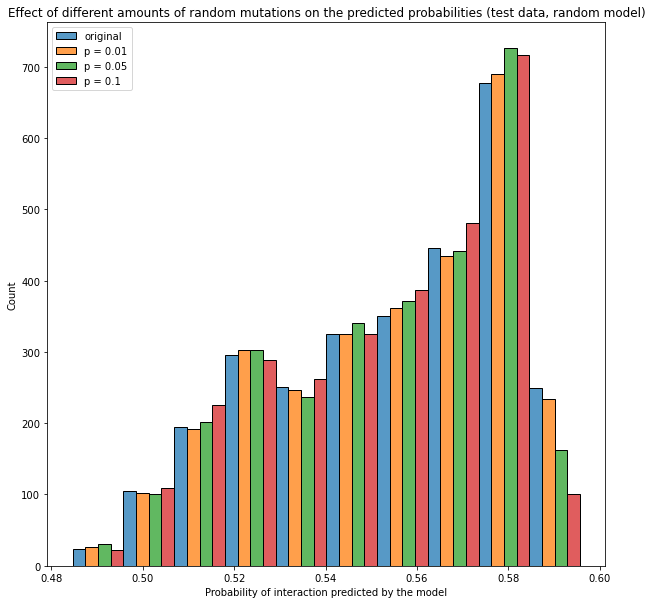

In [5]:
df = pd.DataFrame([preds, preds_001, preds_005, preds_010]).T
df.columns = ["original", "p = 0.01", "p = 0.05", "p = 0.1"]
plt.figure(figsize = [10, 10])
plt.title("Effect of different amounts of random mutations on the predicted probabilities (test data, random model)")
sns.histplot(df, multiple="dodge", bins=10)
plt.xlabel("Probability of interaction predicted by the model")
plt.show()

In [6]:
model_dl.load_trained()

Model loaded successfully


In [7]:
loader = model_dl.get_dataloader_pred(model_dl._test_split)
preds = model_dl._torch_predict(loader)
loader = model_dl.get_dataloader_pred(model_dl._test_split, p_protein_mutation=0.01)
preds_001 = model_dl._torch_predict(loader)
loader = model_dl.get_dataloader_pred(model_dl._test_split, p_protein_mutation=0.05)
preds_005 = model_dl._torch_predict(loader)
loader = model_dl.get_dataloader_pred(model_dl._test_split, p_protein_mutation=0.10)
preds_010 = model_dl._torch_predict(loader)
loader = model_dl.get_dataloader_pred(model_dl._test_split, p_protein_mutation=0.30)
preds_030 = model_dl._torch_predict(loader)

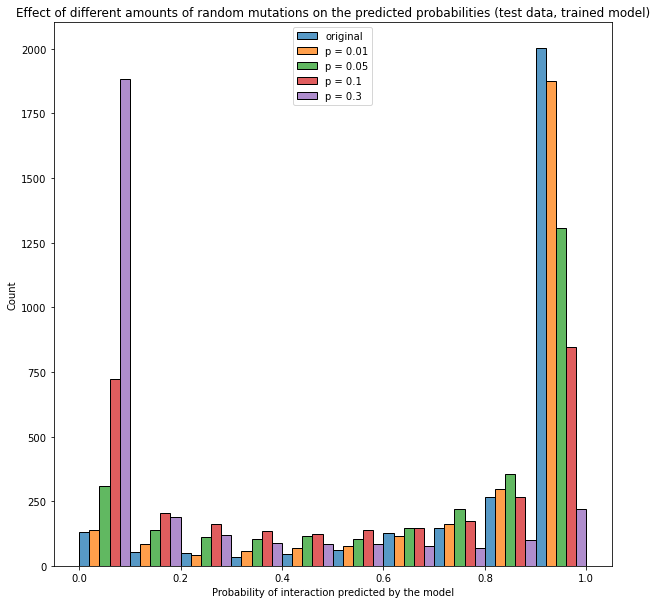

In [8]:
df = pd.DataFrame([preds, preds_001, preds_005, preds_010, preds_030]).T
df.columns = ["original", "p = 0.01", "p = 0.05", "p = 0.1", "p = 0.3"]
plt.figure(figsize = [10, 10])
plt.title("Effect of different amounts of random mutations on the predicted probabilities (test data, trained model)")
sns.histplot(df, multiple="dodge", bins=10)
plt.xlabel("Probability of interaction predicted by the model")
plt.show()